In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
%matplotlib inline
# warnings.filterwarnings('ignore')
sns.set()

In [3]:
df = pd.read_csv('data/preprocessed/cleaned.csv').drop(columns=['Unnamed: 0'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Age
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,Non-Edible,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [4]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'New_Item_Type', 'Outlet_Age'],
      dtype='object')

In [5]:
X, y = df.drop(columns=['Item_Outlet_Sales', 'Item_Type', 'Outlet_Establishment_Year']), df['Item_Outlet_Sales']

In [6]:
# X.to_csv(path_or_buf= "data/features.csv")
# y.to_csv(path_or_buf="data/targets.csv")

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from utils.custom_transformers import CustomTransformer

In [9]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type',
       'Outlet_Age'],
      dtype='object')

In [10]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Age
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,FD,14
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,DR,4
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,FD,14
3,19.20,Regular,0.000000,182.0950,NaN,Tier 3,Grocery Store,FD,15
4,8.93,Non-Edible,0.000000,53.8614,High,Tier 3,Supermarket Type1,NC,26


In [11]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
X.columns

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
categorical_encoder = CustomTransformer(transformers=[
    ('temp_impute',SimpleImputer(strategy='constant', fill_value='Missing'),['Outlet_Size']),
    ('numerical_encoder', OrdinalEncoder(categories=[
        ['Non-Edible','Low Fat', 'Regular'],
        ['Small', 'Medium', 'High', 'Missing'],
        ['Tier 1', 'Tier 2', 'Tier 3']
    ]),['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['New_Item_Type','Outlet_Type']),
    ('temp_impute_restore', SimpleImputer(strategy='constant', fill_value=np.NAN, missing_values=3.),['Outlet_Size'])
])

In [15]:
X_train = categorical_encoder.fit_transform(X_train)

In [16]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,New_Item_Type_FD,New_Item_Type_NC,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
549,9.500,2.0,0.035206,171.3448,1.0,0.0,14,1.0,0.0,1.0,0.0,0.0
7757,18.000,0.0,0.047473,170.5422,NaN,1.0,11,0.0,1.0,1.0,0.0,0.0
764,17.600,2.0,0.076122,111.7202,0.0,0.0,16,1.0,0.0,1.0,0.0,0.0
6867,8.325,1.0,0.029845,41.6138,NaN,1.0,11,1.0,0.0,1.0,0.0,0.0
2716,12.850,1.0,0.137228,155.5630,0.0,0.0,16,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9.395,2.0,0.286345,139.1838,NaN,2.0,15,1.0,0.0,0.0,0.0,0.0
5191,15.600,1.0,0.117575,75.6670,NaN,1.0,6,1.0,0.0,1.0,0.0,0.0
5390,17.600,0.0,0.018944,237.3590,NaN,1.0,11,0.0,1.0,1.0,0.0,0.0
860,20.350,1.0,0.054363,117.9466,NaN,1.0,6,1.0,0.0,1.0,0.0,0.0


In [17]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer

In [18]:
X_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age', 'New_Item_Type_FD',
       'New_Item_Type_NC', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [19]:
from sklearn.preprocessing import KBinsDiscretizer

In [20]:
descretizer = CustomTransformer(transformers=[
    ('descrete_age' ,KBinsDiscretizer(encode='ordinal', strategy='quantile', subsample=200_000), ['Outlet_Age'])
])

In [21]:
X_train = descretizer.fit_transform(X_train)

In [22]:
descretizer.transformers[0][1].bin_edges_

array([array([ 4.,  6., 11., 15., 26., 28.])], dtype=object)

In [23]:
imputer_and_normalizer = CustomTransformer(transformers=[
    ('root_transform',FunctionTransformer(func=np.sqrt),['Item_Visibility']),
    ('temp_impute', SimpleImputer(strategy='constant', fill_value=np.NAN, missing_values=0.),['Item_Visibility']),
    ('knn_imputer' ,KNNImputer(n_neighbors=5, weights='distance'),list(X_train.columns)),
    ('log_transform',FunctionTransformer(func=np.log1p),['Item_Weight']),
    ('scaler',StandardScaler(),['Item_Weight', 'Item_MRP'])
])

In [24]:
X_train = imputer_and_normalizer.fit_transform(X_train)

In [25]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,New_Item_Type_FD,New_Item_Type_NC,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
549,-0.674890,2.0,0.187632,0.470709,1.000000,0.0,2.0,1.0,0.0,1.0,0.0,0.0
7757,1.096958,0.0,0.217883,0.457877,0.360989,1.0,2.0,0.0,1.0,1.0,0.0,0.0
764,1.033389,2.0,0.275902,-0.482625,0.000000,0.0,3.0,1.0,0.0,1.0,0.0,0.0
6867,-1.029449,1.0,0.172758,-1.603553,0.199708,1.0,2.0,1.0,0.0,1.0,0.0,0.0
2716,0.152411,1.0,0.370443,0.218375,0.000000,0.0,3.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.704916,2.0,0.535112,-0.043511,1.183311,2.0,3.0,1.0,0.0,0.0,0.0,0.0
5191,0.693521,1.0,0.342891,-1.059078,0.000000,1.0,1.0,1.0,0.0,1.0,0.0,0.0
5390,1.033389,0.0,0.137636,1.526207,1.029452,1.0,2.0,0.0,1.0,1.0,0.0,0.0
860,1.445352,1.0,0.233158,-0.383072,0.358409,1.0,1.0,1.0,0.0,1.0,0.0,0.0


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

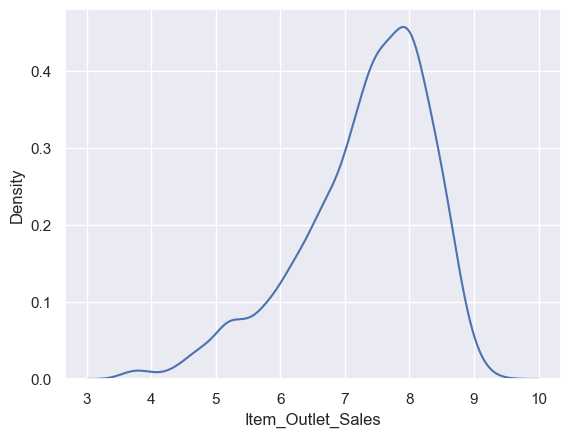

In [26]:
sns.kdeplot(np.log1p(y_train))

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
preprocessing_pipeline = Pipeline(steps=[
    ('categorical_encoder',categorical_encoder),
    ('descretizer',descretizer),
    ('imputer_and_normalizer', imputer_and_normalizer)
],verbose=True)

In [29]:
X_test = preprocessing_pipeline.transform(X_test)

In [30]:
X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,New_Item_Type_FD,New_Item_Type_NC,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.449881,1.0,0.162172,-0.998908,2.0,2.0,4.0,1.0,0.0,1.0,0.0,0.0
2957,-1.158761,0.0,0.266713,-1.586048,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0
7031,0.488682,2.0,0.203256,-1.596652,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0
1084,-0.286352,2.0,0.211582,0.508453,1.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0
856,-0.483407,2.0,0.111605,0.889079,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7205,-0.083133,2.0,0.306032,-0.235593,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0
3257,-1.479864,1.0,0.304694,0.100223,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
6346,0.488682,2.0,0.203014,-1.596652,2.0,2.0,4.0,1.0,0.0,1.0,0.0,0.0
6318,-0.590726,2.0,0.375744,-1.461459,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
import dill as pickle

In [32]:
with open('artifacts/preprocessing.pkl', 'wb') as file:
    pickle.dump(preprocessing_pipeline,file)

In [33]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,New_Item_Type_FD,New_Item_Type_NC,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
549,-0.674890,2.0,0.187632,0.470709,1.000000,0.0,2.0,1.0,0.0,1.0,0.0,0.0
7757,1.096958,0.0,0.217883,0.457877,0.360989,1.0,2.0,0.0,1.0,1.0,0.0,0.0
764,1.033389,2.0,0.275902,-0.482625,0.000000,0.0,3.0,1.0,0.0,1.0,0.0,0.0
6867,-1.029449,1.0,0.172758,-1.603553,0.199708,1.0,2.0,1.0,0.0,1.0,0.0,0.0
2716,0.152411,1.0,0.370443,0.218375,0.000000,0.0,3.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.704916,2.0,0.535112,-0.043511,1.183311,2.0,3.0,1.0,0.0,0.0,0.0,0.0
5191,0.693521,1.0,0.342891,-1.059078,0.000000,1.0,1.0,1.0,0.0,1.0,0.0,0.0
5390,1.033389,0.0,0.137636,1.526207,1.029452,1.0,2.0,0.0,1.0,1.0,0.0,0.0
860,1.445352,1.0,0.233158,-0.383072,0.358409,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [34]:
y_trf = FunctionTransformer(func=np.log1p, inverse_func=lambda x: np.exp(x)-1)

In [35]:
y_train = y_trf.transform(y_train)

In [36]:
y_test = y_trf.transform(y_test)

In [37]:
with open('artifacts/preprocessing_y.pkl', 'wb') as file:
    pickle.dump(y_trf,file)

In [38]:
X_train.to_csv(path_or_buf='data/X_train.csv')
X_test.to_csv(path_or_buf='data/X_test.csv')
y_train.to_csv(path_or_buf='data/y_train.csv')
y_test.to_csv(path_or_buf='data/y_test.csv')